# **DATASET:**

 This dataset contains synthetically generated patient records for 10 of the most prevalent diseases affecting global populations.

# **TASK 1**

**1: Load the dataset using pandas.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/synthetic_asthma_dataset.csv")

**2: Print the shape, column names, and the first few rows using .head().**

In [ ]:
print("Shape of the dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

Shape of the dataset: (10000, 17)

Column Names: ['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies', 'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities', 'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level']

First 5 rows:
   Patient_ID  Age  Gender   BMI Smoking_Status  Family_History Allergies  \
0  ASTH100000   52  Female  27.6         Former               1       NaN   
1  ASTH100001   15    Male  24.6         Former               0      Dust   
2  ASTH100002   72  Female  17.6          Never               0       NaN   
3  ASTH100003   61    Male  16.8          Never               0  Multiple   
4  ASTH100004   21    Male  30.2          Never               0       NaN   

  Air_Pollution_Level Physical_Activity_Level Occupation_Type Comorbidities  \
0            Moderate               Sedentary         Outdoor      Diabetes   
1                 

**3: Use .info() and .describe() for summary statistics.**

In [ ]:
print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  F

***4: Create a scatter plot to show relationships between features. ***

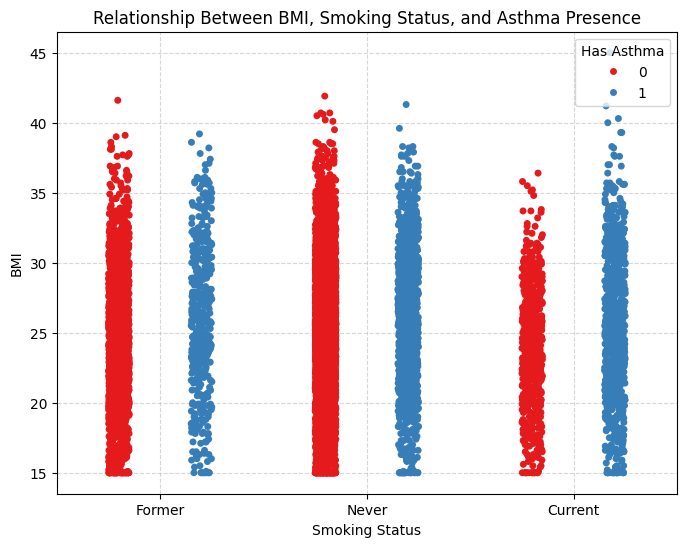

In [ ]:

# Encode Has_Asthma as categorical if it's not already
df['Has_Asthma'] = df['Has_Asthma'].astype(str)

# Scatter-like visualization with Smoking_Status on x-axis, BMI on y-axis, hue for Has_Asthma
plt.figure(figsize=(8, 6))
sns.stripplot(
    data=df,
    x='Smoking_Status',
    y='BMI',
    hue='Has_Asthma',
    jitter=True,
    palette='Set1',
    dodge=True
)

plt.title('Relationship Between BMI, Smoking Status, and Asthma Presence')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Has Asthma")
plt.show()


**5: Use histograms to show value distributions.**

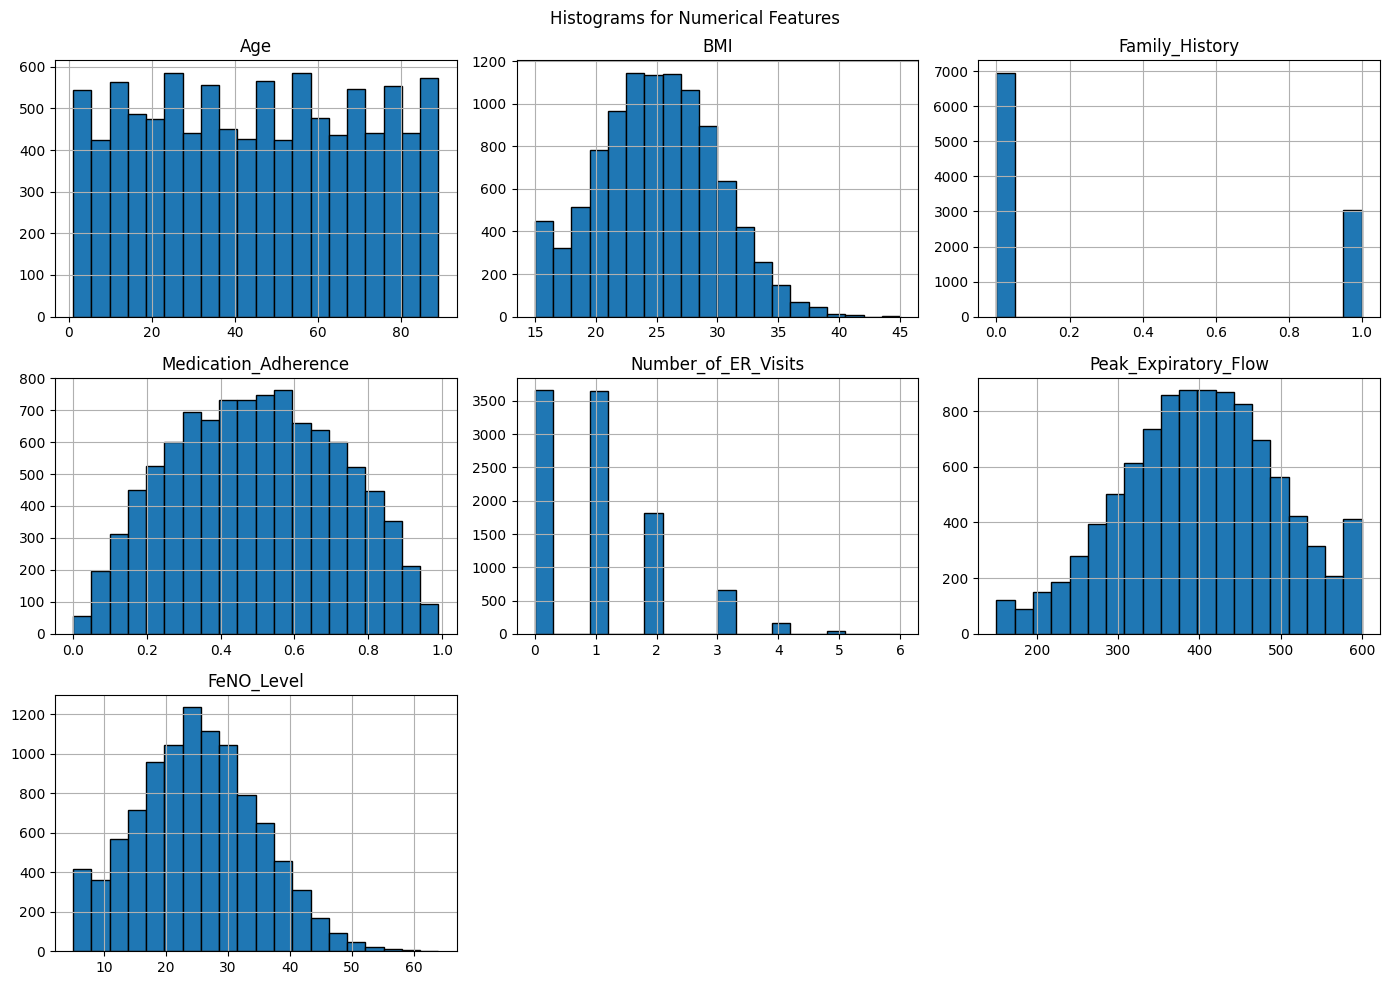

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms for Numerical Features")
plt.tight_layout()
plt.show()


**6: Use box plots to identify outliers.**

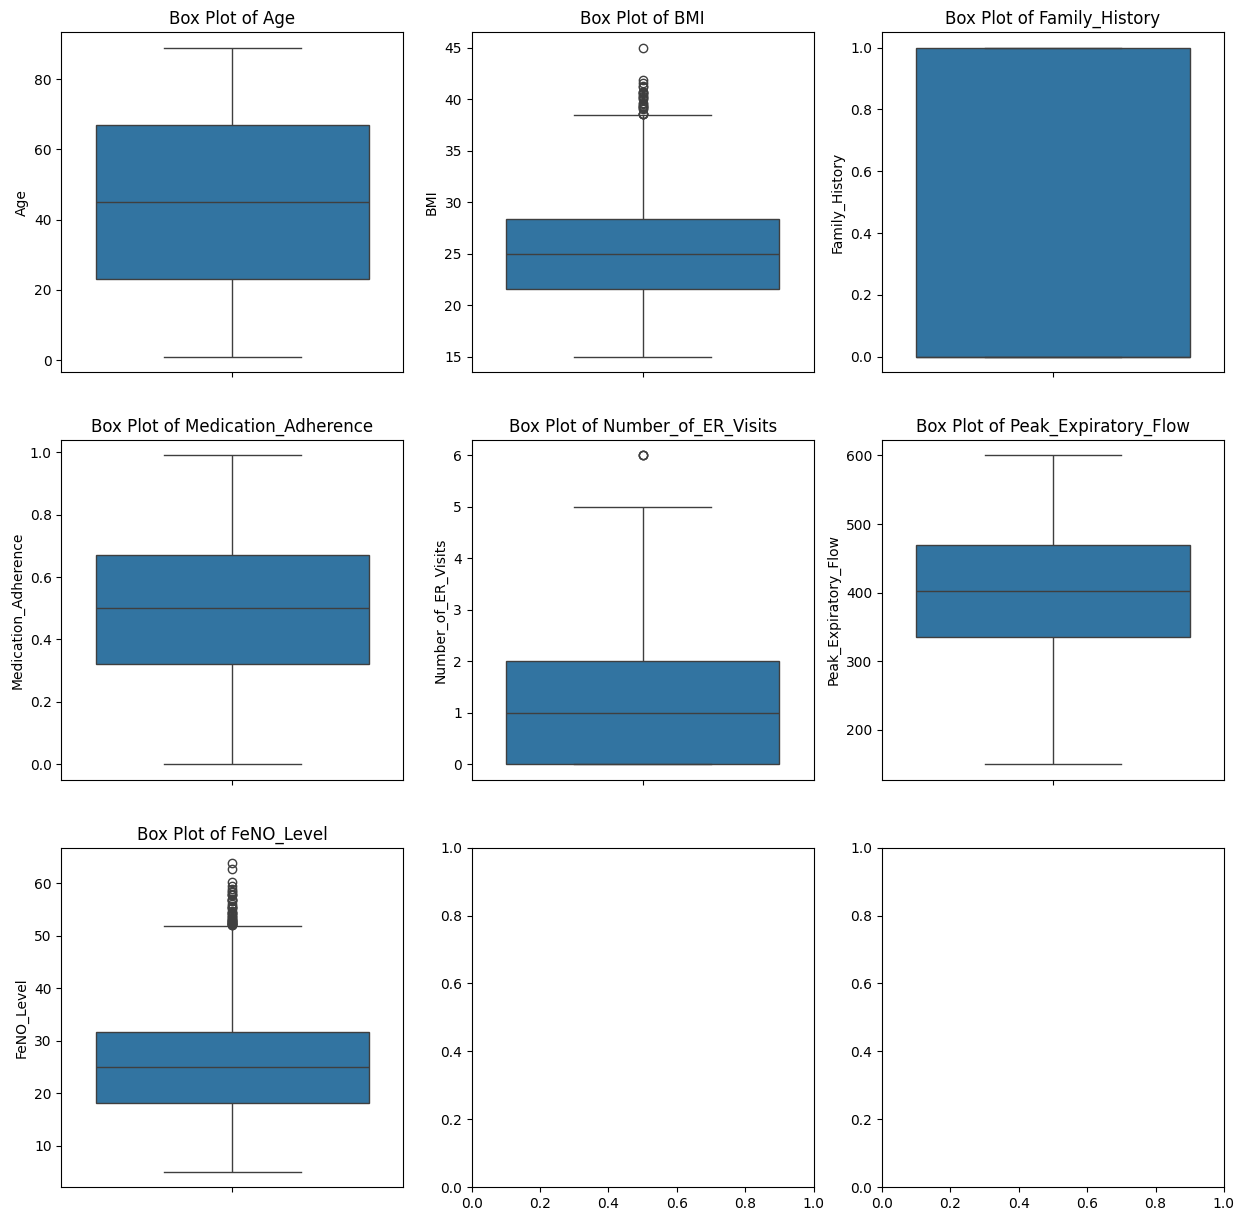

In [ ]:
num_cols = len(numeric_cols)
rows = (num_cols + 2) // 3

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, column in enumerate(numeric_cols):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')